# 1. Imports

In [52]:
import pandas as pd
from pandas_profiling import ProfileReport
import re
%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib.pyplot import pie, axis, show

In [22]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 2. Préparation des données

### 2.1 Analyse et tri des colonnes 

In [23]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**PassengerId** : ID unique du passager *drop*

**Survived** : État de vie du passager *On prend*

**Pclass** : Classe du ticket > 1 = 1ère classe / 2 = 2ème classe / 3 = 3ème classe *On prend*

**Name** : Nom du passager > a noter que le nom du passager varie en fonction de son sexe *string, drop*

**Sex** : Genre du passager > 0 = F / 1 = M *On prend*

**Age** : Age du passager *On prend*

**SibSp** : Nombre de frères/soeurs/conjoints à bord du Titanic *On prend*

**Parch** : Nombre de parents/enfants à bord *On prend*

**Ticket** : Numero de ticket du passager *drop*

**Fare** : Tarif par passager *On prend*

**Cabin** : Numero de cabine des passagers *drop*

**Embarked** : Port d'embarquement > C = Chebourg / Q = Queenstown / S = Southampton *On prend*

In [24]:
# On drop les colonnes qu'on ignore
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 2.2 Analyse et tri des types et des valeurs nulles

In [25]:
print('Colonne - Type - Nombre de valeurs uniques - %age de valeurs présentes')
print('----------------------------------------------------------------------')
for col in train_df.columns:
    print('%s - %s - %s - %s'%(col, train_df[col].dtypes, len(train_df[col].unique()), int(len(train_df[train_df[col].isnull() == False]) / len(train_df) * 100)))
print('----------------------------------------------------------------------')

Colonne - Type - Nombre de valeurs uniques - %age de valeurs présentes
----------------------------------------------------------------------
Survived - int64 - 2 - 100
Pclass - int64 - 3 - 100
Sex - object - 2 - 100
Age - float64 - 89 - 80
SibSp - int64 - 7 - 100
Parch - int64 - 7 - 100
Fare - float64 - 248 - 100
Embarked - object - 4 - 99
----------------------------------------------------------------------


In [26]:
train_df.dropna(inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


# 3. Exploration des données

### Data Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFB4157748>],
      dtype=object)

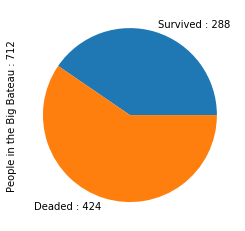

In [76]:
# Survived
a = train_df['Survived'].value_counts()
b = pd.Series({'Survived : %s'%a[1] : a[1], 'Deaded : %s'%a[0] : a[0]})
b.plot(kind='pie', label='People in the Big Bateau : %s'%(a[0] + a[1]), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFB41E2D08>],
      dtype=object)

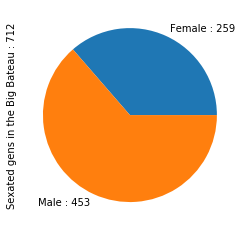

In [80]:
a = train_df['Sex'].value_counts()
b = pd.Series({'Female : %s'%a[1] : a[1], 'Male : %s'%a[0] : a[0]})
b.plot(kind='pie', label='Sexated gens in the Big Bateau : %s'%(a[0] + a[1]), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFB4237288>],
      dtype=object)

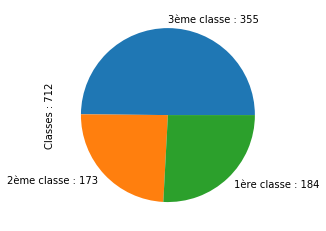

In [88]:
a = train_df['Pclass'].value_counts()
b = pd.Series({'3ème classe : %s'%a[3] : a[3], '2ème classe : %s'%a[2] : a[2], '1ère classe : %s'%a[1] : a[1]})
b.plot(kind='pie', label='Classes : %s'%(a[3] + a[1] + a[2]), subplots=True)

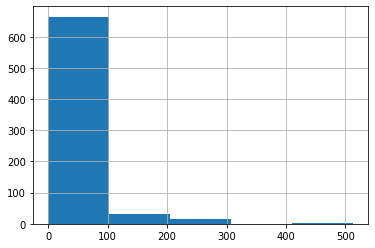

In [92]:
train_df['Fare'].hist(bins=5)

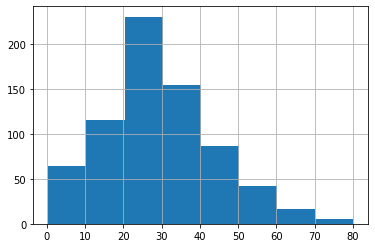

In [95]:
train_df['Age'].hist(bins=8)